In [344]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

### Загрузка даних та візуалізація відсутніх значень:

In [345]:
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<AxesSubplot:>

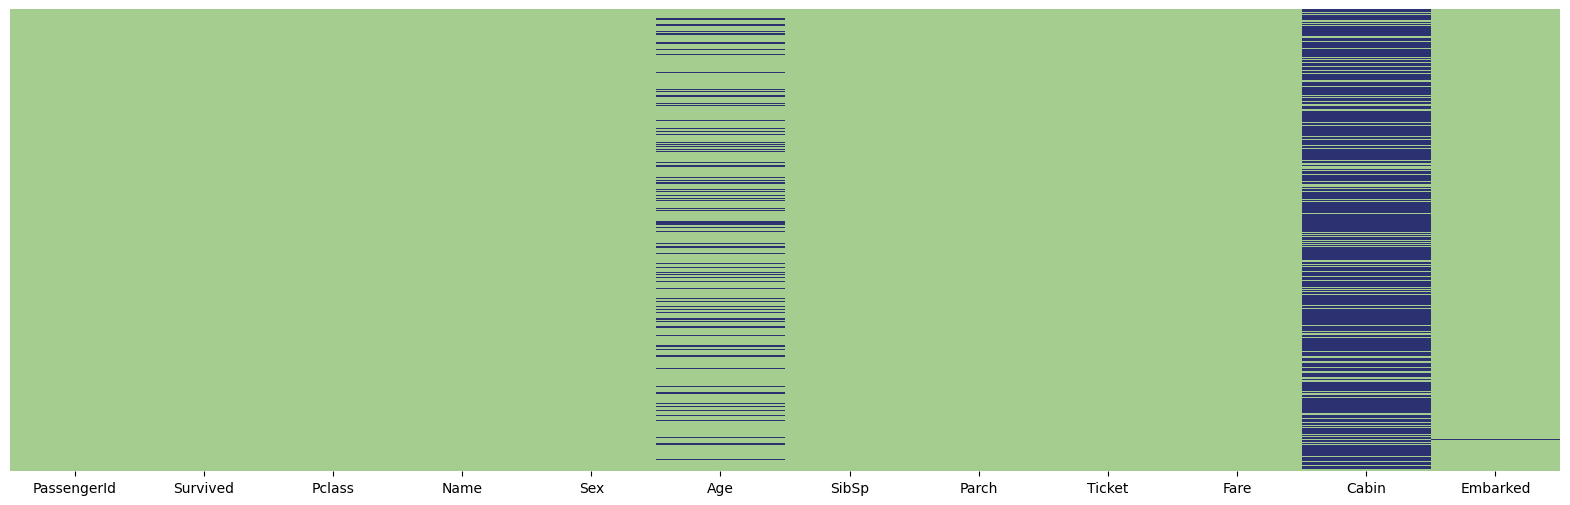

In [346]:
plt.figure(figsize=(20, 6))
sb.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='crest')

### Аналіз та заповнення відсутніх значень:

In [347]:
df.isnull().sum() 

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

##### Атрибут Cabin

In [348]:
df_temp = df[['Survived', 'Cabin']].copy()

In [349]:
df_temp.groupby(df_temp['Cabin'].isnull()).mean()

,Survived
Cabin,
False,0.666667
True,0.299854


In [350]:
df['Cabin'] = np.where(df['Cabin'].isnull(), 0, 1)

##### Атрибут Embarked

In [351]:
df['Embarked'].value_counts()
# C = Cherbourg; Q = Queenstown; S = Southampton

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [352]:
df.Embarked.fillna('S', inplace = True)

##### Атрибут Age

In [353]:
df.groupby('Survived')['Age'].mean()

Survived
0    30.626179
1    28.343690
Name: Age, dtype: float64

In [355]:
df.Age.fillna(df.Age.mean(), inplace=True)

In [357]:
df.to_csv('titanic_fill.csv', index=False)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,1,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,1,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S


### Візуалізація цілосності даних:

<AxesSubplot:>

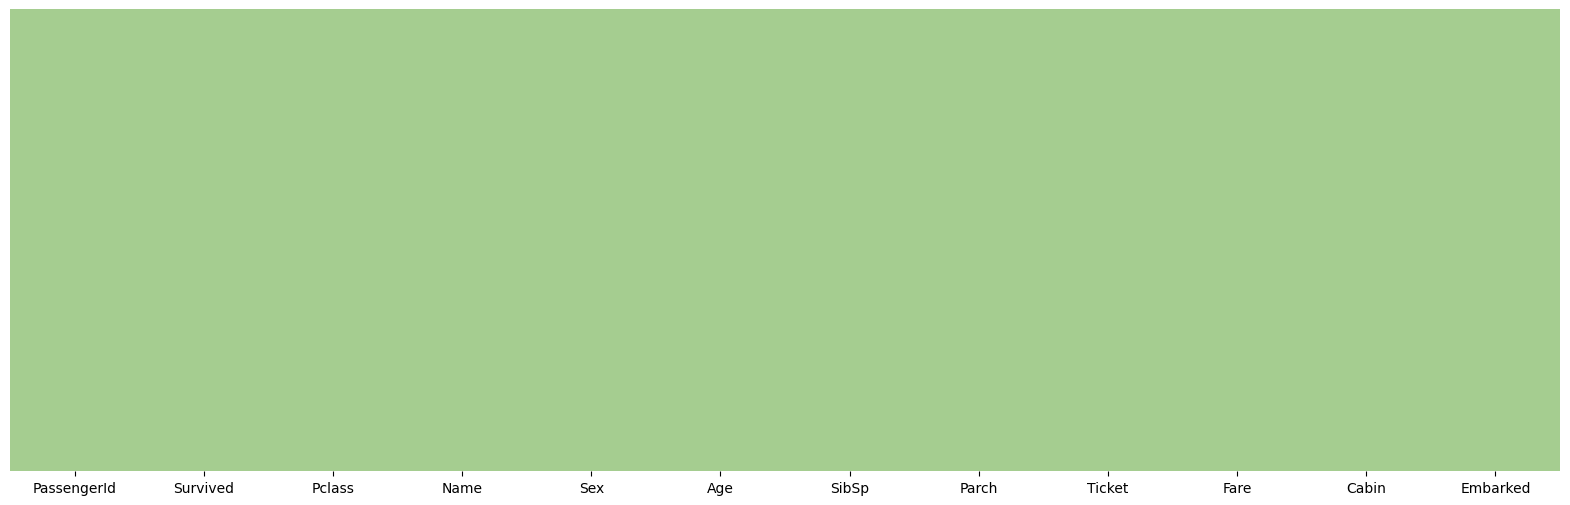

In [358]:
plt.figure(figsize=(20, 6))
sb.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='crest')

In [359]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    int32  
 11  Embarked     891 non-null    object 
dtypes: float64(2), int32(1), int64(5), object(4)
memory usage: 80.2+ KB


### Обґрунтування:

Цільовий датасет мав три атрибути з відсутними даними: Age (вік), Cabin (номер каюти) і Embarked (порт посадки пасажира).
+ Наявність даних щодо номера каюти, здається, напряму не впливає на те чи врятувася пасажир. Але серед тих пасажирів у яких є інформація про номер каюти вижили 66.6%, а серед тих у кого немає - тільки 30%. Можливо, це пов'язано з вартістю квитка. Тому, щоб не втратити важливі дані, я вирішив присвоїти непустим значення атрібуту Cabin 1, а пустим 0.
+ Щодо віку врятованих/неврятованих пасажирів, тут значення відрізняються не суттєво. Середній вік врятованих 28.3 роки, а загиблих 30.6. Тому я вирішив заповнити відсутні занчення загальним серднім віком пасажирів "Тітаніка".
+ В останньому атрібуті Embarked відсутні всього 2 значення. Здається, цей параметр не має значного впливу на виживаняя пасажарів. Оскільки переважна більшість пасажирів (644 люд.) піднялась на борт у Саутгемптоні, я вирішив призначити відсутнім значенням 'S', тобто Саутгемптон. 